**Fully cleaning the dataset**

**Importing data**


In [48]:
# imports
from IPython.display import clear_output
from PIL import Image
import os
import json
# clear
clear_output(wait=True)
# installing kaggle
!pip install -q kaggle
# user and key info
info = {"username":"jackbellamy","key":"3442898ba5e904ac3a48eb5b59398805"}
# opening file
json_object = json.dumps(info, indent=4)
with open("kaggle.json", "w") as outfile:
    outfile.write(json_object)
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# copying data to content file of kaggle which can be found on the left hand side of the screen
if not (os.path.exists("nfl-big-data-bowl-2022")):
  !kaggle competitions download -c nfl-big-data-bowl-2022
  !mkdir nfl-big-data-bowl-2022
  !unzip nfl-big-data-bowl-2022.zip -d nfl-big-data-bowl-2022

mkdir: /Users/emiljino/.kaggle: File exists


**Serialisation**

In [49]:
import pandas as pd
# reading the data to variables
scouting = pd.read_csv("nfl-big-data-bowl-2022/PFFScoutingData.csv")
games = pd.read_csv("nfl-big-data-bowl-2022/games.csv")
players = pd.read_csv("nfl-big-data-bowl-2022/players.csv")
plays = pd.read_csv("nfl-big-data-bowl-2022/plays.csv")
tracking2018 = pd.read_csv("nfl-big-data-bowl-2022/tracking2018.csv")
tracking2019 = pd.read_csv("nfl-big-data-bowl-2022/tracking2019.csv")
tracking2020 = pd.read_csv("nfl-big-data-bowl-2022/tracking2020.csv")

**Generalised cleaning functions**

**Abbreviations to full names**

In [50]:
def abbrvs(csv,column,abbrv,fullname):
  # new names
  type_name = []
  # looping through
  for i in csv[column]:
    # filtering out NaN values
    if i in abbrv:
      index = abbrv.index(i)
      type_name.append(fullname[index])
    else:
      type_name.append(i)
  return type_name

**Team and number splitting**

In [51]:
def team_number_splitting(csv,column,symbol):
  # splitting to team and number
  split_team = []
  split_numbers = []
  # splitting the data
  split = csv[column].str.split(symbol, expand = True)
  # loop for each
  for i in range(0,len(csv)):
    # specific data
    split.iloc[i]
    # number of NaN
    nan_num = split.iloc[i].isna().sum()
    max = len(split.iloc[i])
    if max-nan_num == 0:
      split_team.append(csv[column][i])
      split_numbers.append(csv[column][i])
    else:
      info = []
      for j in range(0,(max-nan_num)):
        split_i = split[j][i].split(" ")
        info.append(split_i)
      # team name
      split_team.append(info[0][0])
      # numbers
      nums = []
      for k in range(0,max-nan_num):
        num = info[k][1]
        nums.append(num)
      split_numbers.append(nums)
  return split_team,split_numbers

**Number splitting**

In [52]:
def number_splitting(csv,column,symbol,n):
  split = csv[column].str.split(symbol, n = n, expand = True)
  return split

**Pandas to number**

In [53]:

def pd_to_num(csv,split,column_names):
  split.columns = column_names
  # adding columns
  for name in column_names:
    csv[name] = pd.to_numeric(split[name])
  return

**Scouting** 


In [54]:
# before
scouting.head()

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHI 58,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,NaN,NaN,NaN,NaN,NaN,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21,BF


In [55]:
# abbreviations: 'kickType', 'kickDirectionIntended', 'kickDirectionActual', 'returnDirectIntended', 'returnDirectionActual', 'KickTypeContact'
# team number splitting: 'missedTackler', 'specialTeamsSafeties', 'Vises'
# number splitting: 'kickoffReturnFormation'

In [56]:
# abbreviations
# 'kickType'
csv = scouting
column = "kickType"
kick_types = ['D','F','K','O','P','Q','S','B','N','R','A']
kick_type_names = ['Deep','Flat','Free','Obvious','Pooch','Squib','Surprise','Deep','Normal','Rugby','Aussie']
# calling function
kick_type_fullnames = abbrvs(csv,column,kick_types,kick_type_names)
# adding column
scouting["kick_type_name"] = kick_type_fullnames

# 'kickDirectionIntended', 'kickDirectionActual', 'returnDirectIntended', 'returnDirectionActual', 'KickTypeContact'

In [57]:
# team and numbers
# 'missedTackler'
csv = scouting

column = "missedTackler"
symbol = "; "
# calling function
missed_tackler_team, missed_tackler_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["missed_tackler_team"] = missed_tackler_team
scouting["missed_tackler_numbers"] = missed_tackler_numbers

# 'specialTeamsSafeties'
column = "specialTeamsSafeties"
symbol = "; "
# calling function
specialTeamsSafeties_team, specialTeamsSafeties_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["special_teams_safeties_team"] = specialTeamsSafeties_team
scouting["special_teams_safeties_numbers"] = specialTeamsSafeties_numbers

# 'Vises'
column = "vises"
symbol = "; "
# calling function
vises_team, vises_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["vises_team"] = vises_team
scouting["vises_numbers"] = vises_numbers

In [58]:
# number splitting
# 'kickoffReturnFormation'
csv = scouting
column = "kickoffReturnFormation"
symbol = "-"
n = 2
column_names = ['formation_front','formation_mid','formation_back']
# calling function
formation_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,formation_split,column_names)

In [59]:
# after
scouting.head()

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,...,kick_type_name,missed_tackler_team,missed_tackler_numbers,special_teams_safeties_team,special_teams_safeties_numbers,vises_team,vises_numbers,formation_front,formation_mid,formation_back
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,...,Deep,NaN,NaN,PHI,"[23, 27]",NaN,NaN,8.0,0.0,2.0
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,...,Normal,PHI,[57],NaN,NaN,ATL,"[83, 27, 34, 21]",NaN,NaN,NaN
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,PHI,[58],NaN,NaN,NaN,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,...,Deep,ATL,[83],ATL,"[17, 22]",NaN,NaN,8.0,0.0,2.0
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,...,Normal,NaN,NaN,ATL,[37],ATL,"[83, 34, 21]",NaN,NaN,NaN


**Games**

In [60]:
# before
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN


In [61]:
# abbreviations: 'homeTeamAbbr' , 'visitorTeamAbbr'
# team number splitting:
# number splitting: 'gameDate', 'gameTimeEastern'

In [62]:
# abbreviations
# 'homeTeamAbbr', 'visitorTeamAbbr'

In [63]:
# number splitting
# 'gameDate'
csv = games

column = "gameDate"
symbol = "/"
n = 2
column_names = ['game_date_day','game_date_month','game_date_year']
# calling function
game_date_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_date_split,column_names)

# 'gameTimeEastern'
column = "gameTimeEastern"
symbol = ":"
n = 2
column_names = ['game_time_hour','game_time_minute','game_time_second']
# calling function
game_time_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_time_split,column_names)

In [64]:
# after
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,game_date_day,game_date_month,game_date_year,game_time_hour,game_time_minute,game_time_second
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL,9,6,2018,20,20,0
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF,9,9,2018,13,0,0
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT,9,9,2018,13,0,0
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN,9,9,2018,13,0,0
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN,9,9,2018,13,0,0


**Players**

In [65]:
# before
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen


In [66]:
# abbreviations:
# team number splitting:
# number splitting: birth
# unique one is height

In [67]:
# 'birthDate'
# splitting the numbers
players['birth_year'] = pd.DatetimeIndex(players['birthDate']).year

In [68]:
# 'height'
height_split = players["height"].str.split("-", n = 1, expand = True)
# new column names
height_split.columns = ['Feet', 'Inch']
# adding new columns
players["height_feet"] = pd.to_numeric(height_split["Feet"])
players["height_inch"] = pd.to_numeric(height_split["Inch"])
# still have 73 feet
# getting rid of NaN values
players["height_inch"] = players["height_inch"].fillna(0)
# replacing heights that did not have '-' at start
for i in players["height_feet"]:
    if i > 7:
        j = 0.0833333 * i
        players["height_feet"].replace({i : j}, inplace=True)        
# inches to numerical value
players["height_inch"] = 0.0833333 * players["height_inch"]
# adding feet and inches to get one value
height_numerical = players["height_feet"] + players["height_inch"]
# adding new numerical value column
players["height_numerical"] = pd.to_numeric(height_numerical)

In [69]:
# after
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName,birth_year,height_feet,height_inch,height_numerical
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,1992.0,6.0,0.083333,6.083333
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,1994.0,6.0,0.000000,6.000000
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,1993.0,6.0,0.000000,6.000000
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,1992.0,6.0,0.083333,6.083333
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,1993.0,6.0,0.083333,6.083333


**Plays**

In [70]:
# before
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45


In [71]:
# abbreviations: 'possessionTeam'
# team number splitting: 'penaltyJerseyNumbers'
# number splitting: 'gameClock'

In [72]:
# abbreviations
# 'possessionTeam'

In [73]:
# number splitting
# 'gameClock'
csv = plays

column = "gameClock"
symbol = ":"
n = 2
column_names = ['game_clock_minute','game_clock_second','game_clock_milli']
# calling function
game_time_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_time_split,column_names)

In [74]:
# after
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,game_clock_minute,game_clock_second,game_clock_milli
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,0,0,NaN,66.0,NaN,40,45,15,0,0
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,0,0,NaN,56.0,5.0,36,18,9,20,0
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,0,0,NaN,21.0,NaN,0,13,5,3,0
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,0,3,NaN,64.0,30.0,34,75,5,1,0
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,0,3,NaN,65.0,NaN,45,45,0,33,0


**Tracking**

In [75]:
# before
tracking2018.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right


In [76]:
# it is clean

**Overall, clean now except 'penaltyJerseyNumbers' and some abbrvs**

**Machine learning**

**SVR**

In [77]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
# getting punt data
data = plays.loc[plays['specialTeamsPlayType'] == "Punt"]
# getting variables
data = data[["gameId","playId","kickerId","returnerId","kickReturnYardage","quarter","down","game_clock_minute","yardsToGo","kickLength","playResult"]]
## making/extending variables
# kick type - in scouting
# hang time - in scouting
# punters accuracy - all data here to be applied
scouting_data = scouting[['gameId','playId','kick_type_name','hangTime','kickDirectionIntended','kickDirectionActual','gunners', 'puntRushers', 'specialTeamsSafeties', 'vises']]
# loop for some find of IDs



# returners average
# returner ids
returner_id = data['returnerId']
average_return = []
# create loop to find stuff then mean 
for returner in returner_id:
  yards = data.loc[(data["returnerId"] == returner), "kickReturnYardage"]
  average_return.append(yards.mean())
# adding to data 
data["returner_average"] = average_return
mean_value=data['returner_average'].mean()
data['returner_average'].fillna(value=mean_value, inplace=True)



# number of defenders in back - all data here to be applied
defender_data = scouting[['gameId','playId','formation_front','formation_mid','formation_back']]


# viewing
#data.head()
scouting_data.head()

,gameId,playId,kick_type_name,hangTime,kickDirectionIntended,kickDirectionActual,gunners,puntRushers,specialTeamsSafeties,vises
0,2018090600,37,Deep,3.85,R,R,NaN,NaN,PHI 23; PHI 27,NaN
1,2018090600,366,Normal,4.46,C,C,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,PHI 58,NaN
3,2018090600,677,Deep,4.06,R,R,NaN,NaN,ATL 17; ATL 22,NaN
4,2018090600,872,Normal,4.35,C,L,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21


In [79]:
# practice area
#merged_data = data.merge(scouting_data, on=['gameId', 'playId'])

data['playId'] = data['playId'].astype('int64')
scouting_data['playId'] = scouting_data['playId'].astype('int64')
data['gameId'] = data['gameId'].astype('int64')
scouting_data['gameId'] = scouting_data['gameId'].astype('int64')
merged_data = pd.merge(data, scouting_data, on=['gameId', 'playId'], how='inner')
merged_data.head()

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/1406806063.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/1406806063.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gameId,playId,kickerId,returnerId,kickReturnYardage,quarter,down,game_clock_minute,yardsToGo,kickLength,playResult,returner_average,kick_type_name,hangTime,kickDirectionIntended,kickDirectionActual,gunners,puntRushers,specialTeamsSafeties,vises
0,2018090600,366,45603.0,42450,5.0,1,4,9,4,56.0,36,7.666667,Normal,4.46,C,C,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21
1,2018090600,872,45603.0,NaN,NaN,1,4,0,18,65.0,45,8.556802,Normal,4.35,C,L,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21
2,2018090600,973,37267.0,29957,NaN,2,4,14,19,49.0,49,8.450000,Normal,4.98,L,L,ATL 83; ATL 28,PHI 28; PHI 37; PHI 54; PHI 57,NaN,PHI 29; PHI 32
3,2018090600,1850,45603.0,NaN,NaN,2,4,1,8,58.0,58,8.556802,Normal,4.53,R,R,PHI 18; PHI 29,ATL 28; ATL 85,NaN,ATL 83; ATL 23
4,2018090600,1989,37267.0,29957,8.0,2,4,0,8,57.0,61,8.450000,Normal,4.62,C,C,ATL 83; ATL 28,NaN,NaN,PHI 29; PHI 37; PHI 32


In [80]:
# sorting out NA values

# vieiwng
data.head()

,gameId,playId,kickerId,returnerId,kickReturnYardage,quarter,down,game_clock_minute,yardsToGo,kickLength,playResult,returner_average
1,2018090600,366,45603.0,42450,5.0,1,4,9,4,56.0,36,7.666667
4,2018090600,872,45603.0,NaN,NaN,1,4,0,18,65.0,45,8.556802
5,2018090600,973,37267.0,29957,NaN,2,4,14,19,49.0,49,8.450000
10,2018090600,1850,45603.0,NaN,NaN,2,4,1,8,58.0,58,8.556802
11,2018090600,1989,37267.0,29957,8.0,2,4,0,8,57.0,61,8.450000


In [113]:
# final data
final_data = data[["game_clock_minute","yardsToGo","kickLength","returner_average","playResult"]]  
final_dataSVR = data[["game_clock_minute","yardsToGo","kickLength","returner_average","playResult","kickReturnYardage"]]
final_dataRed = data[["yardsToGo","kickLength","returner_average","playResult"]]  

final_data_gunners = merged_data[["playId", "gameId" ,"game_clock_minute","yardsToGo","kickLength","returner_average","playResult","gunners", "puntRushers", "specialTeamsSafeties", "vises"]]

final_data = final_data.dropna(axis="rows",how="any")
final_data_gunners.dropna(0, inplace=True)

final_data_gunners.head()

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/3979345145.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/3979345145.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,playId,gameId,game_clock_minute,yardsToGo,kickLength,returner_average,playResult,gunners,puntRushers,specialTeamsSafeties,vises
1,872,2018090600,0,18,65.0,8.556802,45,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21
8,3225,2018090600,0,6,38.0,8.556802,38,ATL 82; ATL 17; ATL 28,PHI 18,PHI 43,PHI 29; PHI 32
15,1360,2018090900,12,14,50.0,8.666667,49,BUF 30; BUF 26,BAL 10,BAL 41,BAL 28; BAL 36; BAL 26
41,4833,2018090901,5,20,53.0,10.116279,53,PIT 46; PIT 88,CLE 84,CLE 37,CLE 20; CLE 39; CLE 38
45,3547,2018090902,10,2,46.0,9.426230,46,IND 30; IND 14,CIN 33,CIN 80,CIN 40; CIN 29; CIN 21


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px

# features and labels
features = final_data[["game_clock_minute","yardsToGo","kickLength","returner_average"]]           #.drop(columns = ["gameId","playId","playDescription","playResult"])
labels = final_data["playResult"]
# splitting
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, random_state = 42)
# model
model = RandomForestClassifier(criterion = "gini",
                               max_depth = 8,
                               min_samples_split = 10,
                               random_state = 42,
                               )
# fitting
model.fit(X_train, Y_train)
# importance
info = model.feature_importances_
# printing
print("feature importance \n---------------------------------")
for i in range(len(features.columns)):
  print(features.columns[i] , ": " , round(info[i],3))
print("---------------------------------")
# predicting
Y_pred = model.predict(X_test)
acc = accuracy_score(Y_test,Y_pred)
print("accuracy: ",round(acc,3))
# accuracy in interval
interval = 0.1 # 10%
counter = 0
Y_test = pd.Series(Y_test).values
for i in range(len(Y_test)):
  if Y_pred[i] <= Y_test[i]*(1+interval) and Y_test[i]*(1-interval) <= Y_pred[i]:
    counter += 1
interval_acc = counter/len(Y_test)
print("accuracy within ", interval*100,"%: ", round(interval_acc,3))

feature importance 
---------------------------------
game_clock_minute :  0.063
yardsToGo :  0.074
kickLength :  0.767
returner_average :  0.096
---------------------------------
accuracy:  0.39
accuracy within  10.0 %:  0.585


In [83]:
import numpy as np
import plotly.graph_objects as go

fig = go.Figure()

# plotting
fig = px.scatter(x = Y_test, 
                 y= Y_pred,
                 trendline = "ols",
                 trendline_color_override="red",
                 #name = "trendline",
                 labels=dict(x="Actual play result", y="Predicted play result"),
                 width=500, 
                 height=500
                )

x = np.linspace(-40,80)

fig.add_trace(go.Scatter(
    x=x,
    y=x,
    name="y = x",
))

# fig.update_layout(xaxis_range=[min(Y_test),max(Y_test)],
#                   yaxis_range=[min(Y_pred),max(Y_pred)]
# )

fig.update_layout(xaxis_range=[min(Y_test),max(Y_test)],
                  yaxis_range=[min(Y_test),max(Y_test)]
)

model = px.get_trendline_results(fig)
alpha = model.iloc[0]["px_fit_results"].params[0]
beta = model.iloc[0]["px_fit_results"].params[1]

fig.data[0].name = 'observations'
fig.data[0].showlegend = True
fig.data[1].name = fig.data[1].name  + 'y = ' + str(round(alpha, 2)) + ' + ' + str(round(beta, 2)) + 'x'
fig.data[1].showlegend = True

fig.update_layout(legend=dict(yanchor="bottom", y=0.02, xanchor="right", x=0.98))

fig.show()

SVR training

In [114]:
# define a function to count the number of gunners on a play

def count_gunners(gunners_str):
    if isinstance(gunners_str, str) and gunners_str != "":
        return len(gunners_str.split(';'))
    else:
        return 0

# apply the function to create a new feature
final_data_gunners['num_gunners'] = final_data_gunners['gunners'].apply(count_gunners)
final_data_gunners.tail()

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/249671100.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,playId,gameId,game_clock_minute,yardsToGo,kickLength,returner_average,playResult,gunners,puntRushers,specialTeamsSafeties,vises,num_gunners
5965,2933,2021010313,14,17,44.0,15.026316,44,JAX 31; JAX 05,IND 49,IND 16; IND 30; IND 31,IND 35; IND 34,2
5967,3282,2021010313,8,15,39.0,15.026316,25,JAX 31; JAX 05,IND 44; IND 90,IND 30; IND 31,IND 35; IND 34,2
5969,3537,2021010313,4,6,46.0,15.026316,35,JAX 31; JAX 05,IND 76; IND 94,IND 30; IND 31,IND 35; IND 34,2
5971,429,2021010314,8,7,49.0,1.500000,49,LA 14; LA 25,ARI 54,ARI 28,ARI 22; ARI 27; ARI 20,2
5972,527,2021010314,7,4,44.0,8.556802,44,ARI 16; ARI 28,LA 30,LA 36; LA 46,LA 31; LA 25,2


In [115]:
# define a function to count the number of puntRushers on a play

def count_puntRushers(puntRushers_str):
    if isinstance(puntRushers_str, str) and puntRushers_str != "":
        return len(puntRushers_str.split(';'))
    else:
        return 0

# apply the function to create a new feature
final_data_gunners['num_puntRushers'] = final_data_gunners['puntRushers'].apply(count_gunners)
final_data_gunners.tail()

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/47763536.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,playId,gameId,game_clock_minute,yardsToGo,kickLength,returner_average,playResult,gunners,puntRushers,specialTeamsSafeties,vises,num_gunners,num_puntRushers
5965,2933,2021010313,14,17,44.0,15.026316,44,JAX 31; JAX 05,IND 49,IND 16; IND 30; IND 31,IND 35; IND 34,2,1
5967,3282,2021010313,8,15,39.0,15.026316,25,JAX 31; JAX 05,IND 44; IND 90,IND 30; IND 31,IND 35; IND 34,2,2
5969,3537,2021010313,4,6,46.0,15.026316,35,JAX 31; JAX 05,IND 76; IND 94,IND 30; IND 31,IND 35; IND 34,2,2
5971,429,2021010314,8,7,49.0,1.500000,49,LA 14; LA 25,ARI 54,ARI 28,ARI 22; ARI 27; ARI 20,2,1
5972,527,2021010314,7,4,44.0,8.556802,44,ARI 16; ARI 28,LA 30,LA 36; LA 46,LA 31; LA 25,2,1


In [116]:
# define a function to count the number of specialTeamsSafeties on a play

def count_puntRushers(specialTeamsSafeties_str):
    if isinstance(specialTeamsSafeties_str, str) and specialTeamsSafeties_str != "":
        return len(specialTeamsSafeties_str.split(';'))
    else:
        return 0

# apply the function to create a new feature
final_data_gunners['num_specialTeamsSafeties'] = final_data_gunners['specialTeamsSafeties'].apply(count_gunners)
final_data_gunners.tail()

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/4214408369.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,playId,gameId,game_clock_minute,yardsToGo,kickLength,returner_average,playResult,gunners,puntRushers,specialTeamsSafeties,vises,num_gunners,num_puntRushers,num_specialTeamsSafeties
5965,2933,2021010313,14,17,44.0,15.026316,44,JAX 31; JAX 05,IND 49,IND 16; IND 30; IND 31,IND 35; IND 34,2,1,3
5967,3282,2021010313,8,15,39.0,15.026316,25,JAX 31; JAX 05,IND 44; IND 90,IND 30; IND 31,IND 35; IND 34,2,2,2
5969,3537,2021010313,4,6,46.0,15.026316,35,JAX 31; JAX 05,IND 76; IND 94,IND 30; IND 31,IND 35; IND 34,2,2,2
5971,429,2021010314,8,7,49.0,1.500000,49,LA 14; LA 25,ARI 54,ARI 28,ARI 22; ARI 27; ARI 20,2,1,1
5972,527,2021010314,7,4,44.0,8.556802,44,ARI 16; ARI 28,LA 30,LA 36; LA 46,LA 31; LA 25,2,1,2


In [117]:
# define a function to count the number of vises on a play

def count_puntRushers(vises_str):
    if isinstance(vises_str, str) and vises_str != "":
        return len(vises_str.split(';'))
    else:
        return 0

# apply the function to create a new feature
final_data_gunners['num_vises'] = final_data_gunners['vises'].apply(count_gunners)
final_data_gunners.tail()

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/2942615249.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,playId,gameId,game_clock_minute,yardsToGo,kickLength,returner_average,playResult,gunners,puntRushers,specialTeamsSafeties,vises,num_gunners,num_puntRushers,num_specialTeamsSafeties,num_vises
5965,2933,2021010313,14,17,44.0,15.026316,44,JAX 31; JAX 05,IND 49,IND 16; IND 30; IND 31,IND 35; IND 34,2,1,3,2
5967,3282,2021010313,8,15,39.0,15.026316,25,JAX 31; JAX 05,IND 44; IND 90,IND 30; IND 31,IND 35; IND 34,2,2,2,2
5969,3537,2021010313,4,6,46.0,15.026316,35,JAX 31; JAX 05,IND 76; IND 94,IND 30; IND 31,IND 35; IND 34,2,2,2,2
5971,429,2021010314,8,7,49.0,1.500000,49,LA 14; LA 25,ARI 54,ARI 28,ARI 22; ARI 27; ARI 20,2,1,1,3
5972,527,2021010314,7,4,44.0,8.556802,44,ARI 16; ARI 28,LA 30,LA 36; LA 46,LA 31; LA 25,2,1,2,2


In [131]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


#final_data_gunners.dropna(inplace=True)
# define the independent variables and dependent variable
X = final_data_gunners[["game_clock_minute", "yardsToGo","kickLength","returner_average","num_gunners", "num_puntRushers", "num_specialTeamsSafeties", "num_vises"]]
X.fillna(0, inplace=True)
y = final_data_gunners['playResult']


# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# perform grid search to find the best hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}
grid = GridSearchCV(SVR(), param_grid, cv=5)
grid.fit(X_train, y_train)

# train the model with the best hyperparameters
svr = grid.best_estimator_
svr.fit(X_train, y_train)


# evaluate the model on the test set
print('Test set R-squared score:', svr.score(X_test, y_test))




/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/963400864.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Test set R-squared score: 0.28484706441383445


In [133]:
test_data = final_data_gunners[(final_data_gunners['playId'] == 4156) & (final_data_gunners['gameId'] == 2020111505), ["game_clock_minute", "yardsToGo","kickLength","returner_average","num_gunners", "num_puntRushers", "num_specialTeamsSafeties", "num_vises"]]



test_data.fillna(0, inplace=True)

test_data.head()

#scaled_test_data = scaler.transform(test_data)

#predicted_result = svr.predict(scaled_test_data)
#print("Predicted playResult:", predicted_result)

InvalidIndexError: (1       False
8       False
15      False
41      False
45      False
        ...  
5965    False
5967    False
5969    False
5971    False
5972    False
Length: 938, dtype: bool, ['game_clock_minute', 'yardsToGo', 'kickLength', 'returner_average', 'num_gunners', 'num_puntRushers', 'num_specialTeamsSafeties', 'num_vises'])

SVR plot

MSE: 88.87546434124197
Accuracy within 10%: 0.5829787234042553


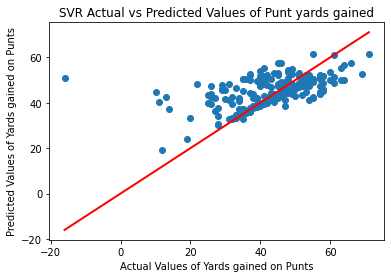

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# make predictions using the SVR model
predictions = svr.predict(X_test)

mse = mean_squared_error(y_test, predictions)

# calculate accuracy within an interval of 10%
pct_diff = abs((y_test - predictions) / y_test)
within_10pct = (pct_diff <= 0.1).sum() / len(pct_diff)

print("MSE:", mse)
#print("Accuracy", pct_diff)
print("Accuracy within 10%:", within_10pct)


# plot actual vs predicted values
plt.scatter(y_test, predictions)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2) # add red line
# plt.plot([predictions.min()], [predictions.max()], 'g-', lw=2) # add red line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2) # add red line
#plt.plot([predictions.min(), predictions.max()], [predictions.min(), predictions.max()], 'g-', lw=2) # add green line
plt.xlabel("Actual Values of Yards gained on Punts")
plt.ylabel("Predicted Values of Yards gained on Punts")
plt.title("SVR Actual vs Predicted Values of Punt yards gained")
plt.show()

In [140]:
test_data = final_data_gunners.loc[(final_data_gunners['playId'] == 4156) & (final_data_gunners['gameId'] == 2020111505), ["game_clock_minute", "yardsToGo","kickLength","returner_average","num_gunners", "num_puntRushers", "num_specialTeamsSafeties", "num_vises"]]

merged_df[["game_clock_minute", "yardsToGo","kickLength","returner_average","num_gunners", "num_puntRushers", "num_specialTeamsSafeties", "num_vises"]]

merged_df.fillna(0, inplace=True)

scaled_test_data = scaler.transform(merged_df[["game_clock_minute", "yardsToGo","kickLength","returner_average","num_gunners", "num_puntRushers", "num_specialTeamsSafeties", "num_vises"]])

predicted_result = svr.predict(scaled_test_data)
print("Predicted playResult:", predicted_result)

Predicted playResult: [14.38546426]


/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/2990913956.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
import pandas as pd

avg = final_data_gunners['returner_average'].mean()

print("Average Returner Average: ", avg)

Average Returner Average:  8.389410175961869


In [91]:
print(plays['passResult'].unique())

[nan 'I' 'C' 'IN' 'S']


In [92]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

# Separate the test data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

norm_y_test = y_test

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# instantiate decision tree classifier with desired hyperparameters
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# fit classifier to training data
clf.fit(x_train, y_train)

# use classifier to predict dependent variable for testing data
y_pred = clf.predict(x_test)

# evaluate performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)


NameError: name 'to_categorical' is not defined

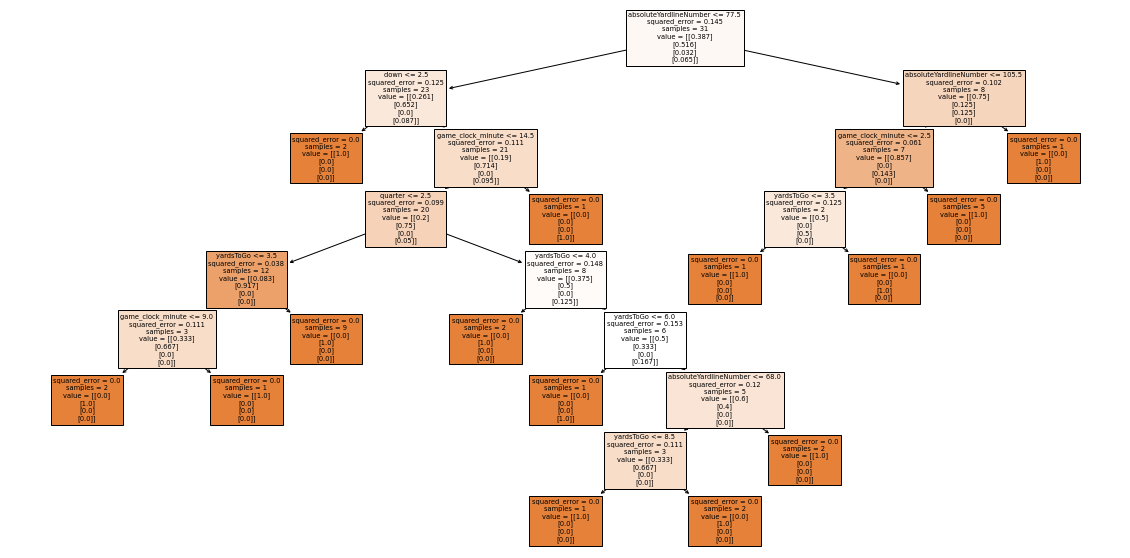

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# create a decision tree regressor
dtree = DecisionTreeRegressor()

# train the model on your data
dtree.fit(x_train, y_train)

# create a plot of the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=data.columns)
plt.show()

In [101]:
import pandas as pd

# assume your plays dataset is already loaded into a pandas dataframe called "plays"

# define the specific playId and gameId you're looking for
play_id = 4156
game_id = 2020111505

# filter the dataframe to find the row with the matching playId and gameId
filtered_df = plays[(plays['playId'] == play_id) & (plays['gameId'] == game_id)]

# print the filtered dataframe to see the matching row(s)
print(filtered_df)

           gameId  playId                                    playDescription  \
16984  2020111505    4156  (7:53) (Punt formation) Direct snap to S.Willi...   

       quarter  down  yardsToGo possessionTeam specialTeamsPlayType  \
16984        4     4         13            CIN                 Punt   

             specialTeamsResult  kickerId  ... preSnapHomeScore  \
16984  Non-Special Teams Result       NaN  ...               36   

       preSnapVisitorScore passResult  kickLength kickReturnYardage  \
16984                    7        NaN         NaN               NaN   

      playResult absoluteYardlineNumber  game_clock_minute  game_clock_second  \
16984         39                     44                  7                 53   

       game_clock_milli  
16984                 0  

[1 rows x 28 columns]


In [102]:
import pandas as pd

# assume your plays dataset is already loaded into a pandas dataframe called "plays"

# define the specific playId and gameId you're looking for
play_id = 4156
game_id = 2020111505

merged_df = merged_data[(merged_data['playId'] == play_id) & (merged_data['gameId'] == game_id)]

print(merged_df)

          gameId  playId  kickerId returnerId  kickReturnYardage  quarter  \
5118  2020111505    4156       NaN        NaN                NaN        4   

      down  game_clock_minute  yardsToGo  kickLength  playResult  \
5118     4                  7         13         NaN          39   

      returner_average kick_type_name  hangTime kickDirectionIntended  \
5118          8.556802            NaN       NaN                   NaN   

     kickDirectionActual gunners puntRushers specialTeamsSafeties vises  
5118                 NaN     NaN         NaN                  NaN   NaN  


In [104]:
merged_df.fillna(0, inplace=True)
print(merged_df)

          gameId  playId  kickerId  returnerId  kickReturnYardage  quarter  \
5118  2020111505    4156       0.0           0                0.0        4   

      down  game_clock_minute  yardsToGo  kickLength  playResult  \
5118     4                  7         13         0.0          39   

      returner_average  kick_type_name  hangTime  kickDirectionIntended  \
5118          8.556802               0       0.0                      0   

      kickDirectionActual  gunners  puntRushers  specialTeamsSafeties  vises  
5118                    0        0            0                     0      0  


/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/1360042620.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
# define a function to count the number of gunners on a play

def count_gunners(gunners_str):
    if isinstance(gunners_str, str) and gunners_str != "":
        return len(gunners_str.split(';'))
    else:
        return 0

# apply the function to create a new feature
merged_df['num_gunners'] = merged_df['gunners'].apply(count_gunners)
merged_df.tail()

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/1263362248.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gameId,playId,kickerId,returnerId,kickReturnYardage,quarter,down,game_clock_minute,yardsToGo,kickLength,...,returner_average,kick_type_name,hangTime,kickDirectionIntended,kickDirectionActual,gunners,puntRushers,specialTeamsSafeties,vises,num_gunners
5118,2020111505,4156,0.0,0,0.0,4,4,7,13,0.0,...,8.556802,0,0.0,0,0,0,0,0,0,0


In [107]:
# define a function to count the number of puntRushers on a play

def count_puntRushers(puntRushers_str):
    if isinstance(puntRushers_str, str) and puntRushers_str != "":
        return len(puntRushers_str.split(';'))
    else:
        return 0

# apply the function to create a new feature
merged_df['num_puntRushers'] = merged_df['puntRushers'].apply(count_gunners)
merged_df.tail()

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/1249619092.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gameId,playId,kickerId,returnerId,kickReturnYardage,quarter,down,game_clock_minute,yardsToGo,kickLength,...,kick_type_name,hangTime,kickDirectionIntended,kickDirectionActual,gunners,puntRushers,specialTeamsSafeties,vises,num_gunners,num_puntRushers
5118,2020111505,4156,0.0,0,0.0,4,4,7,13,0.0,...,0,0.0,0,0,0,0,0,0,0,0


In [108]:
# define a function to count the number of specialTeamsSafeties on a play

def count_puntRushers(specialTeamsSafeties_str):
    if isinstance(specialTeamsSafeties_str, str) and specialTeamsSafeties_str != "":
        return len(specialTeamsSafeties_str.split(';'))
    else:
        return 0

# apply the function to create a new feature
merged_df['num_specialTeamsSafeties'] = merged_df['specialTeamsSafeties'].apply(count_gunners)
merged_df.tail()

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/904766003.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gameId,playId,kickerId,returnerId,kickReturnYardage,quarter,down,game_clock_minute,yardsToGo,kickLength,...,hangTime,kickDirectionIntended,kickDirectionActual,gunners,puntRushers,specialTeamsSafeties,vises,num_gunners,num_puntRushers,num_specialTeamsSafeties
5118,2020111505,4156,0.0,0,0.0,4,4,7,13,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [109]:
# define a function to count the number of vises on a play

def count_puntRushers(vises_str):
    if isinstance(vises_str, str) and vises_str != "":
        return len(vises_str.split(';'))
    else:
        return 0

# apply the function to create a new feature
merged_df['num_vises'] = merged_df['vises'].apply(count_gunners)
merged_df.tail()

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/764276007.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gameId,playId,kickerId,returnerId,kickReturnYardage,quarter,down,game_clock_minute,yardsToGo,kickLength,...,kickDirectionIntended,kickDirectionActual,gunners,puntRushers,specialTeamsSafeties,vises,num_gunners,num_puntRushers,num_specialTeamsSafeties,num_vises
5118,2020111505,4156,0.0,0,0.0,4,4,7,13,0.0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


#final_data_gunners.dropna(inplace=True)
# define the independent variables and dependent variable
X = merged_df[["game_clock_minute", "yardsToGo","kickLength","returner_average","num_gunners", "num_puntRushers", "num_specialTeamsSafeties", "num_vises"]]
X.fillna(0, inplace=True)
y = merged_df['playResult']

# Initialize and fit the SVR model
svr = SVR()
svr.fit(X, y)

# Make predictions using the trained model
predictions = svr.predict(X)

# Print the predictions
print(predictions)




[39.]


/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_2853/3352981491.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MSE: 0.0
Accuracy within 10%: 1.0


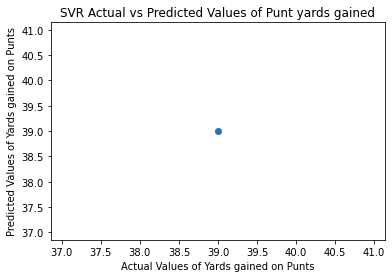

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# make predictions using the SVR model
predictions = svr.predict(X)

mse = mean_squared_error(y, predictions)

# calculate accuracy within an interval of 10%
pct_diff = abs((y - predictions) / y)
within_10pct = (pct_diff <= 0.1).sum() / len(pct_diff)

print("MSE:", mse)
#print("Accuracy", pct_diff)
print("Accuracy within 10%:", within_10pct)


# plot actual vs predicted values
plt.scatter(y, predictions)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2) # add red line
# plt.plot([predictions.min()], [predictions.max()], 'g-', lw=2) # add red line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', lw=2) # add red line
#plt.plot([predictions.min(), predictions.max()], [predictions.min(), predictions.max()], 'g-', lw=2) # add green line
plt.xlabel("Actual Values of Yards gained on Punts")
plt.ylabel("Predicted Values of Yards gained on Punts")
plt.title("SVR Actual vs Predicted Values of Punt yards gained")
plt.show()